# Using Convolutional Neural Networks to Predicte/Classify Characters by Roles

In [21]:
#PIL (imported as Image): The Python Imaging Library, used for working with images.
#os.listdir: A function from the os module to list files in a directory.
#tqdm: A library for creating progress bars in loops.
#cv2: OpenCV library, used for image processing and computer vision tasks.
import numpy as np
import pandas as pd
import json
from PIL import Image
from os import listdir
from tqdm import tqdm
import cv2



In [22]:
img_path_loading = 'loading/'
img_path_tiles = 'tiles/'
img_path_icon = 'champion/'
data_path = 'champion.json'

In [23]:
with open(data_path, encoding='utf-8') as f:
    champion_data = json.load(f)



League of Legends character data for Welela's favorite character 'Zed':

In [24]:
champion_data['data']['Zed']

{'version': '11.11.1',
 'id': 'Zed',
 'key': '238',
 'name': 'Zed',
 'title': 'the Master of Shadows',
 'blurb': "Utterly ruthless and without mercy, Zed is the leader of the Order of Shadow, an organization he created with the intent of militarizing Ionia's magical and martial traditions to drive out Noxian invaders. During the war, desperation led him to unlock...",
 'info': {'attack': 9, 'defense': 2, 'magic': 1, 'difficulty': 7},
 'image': {'full': 'Zed.png',
  'sprite': 'champion5.png',
  'group': 'champion',
  'x': 0,
  'y': 0,
  'w': 48,
  'h': 48},
 'tags': ['Assassin'],
 'partype': 'Energy',
 'stats': {'hp': 584,
  'hpperlevel': 85,
  'mp': 200,
  'mpperlevel': 0,
  'movespeed': 345,
  'armor': 32,
  'armorperlevel': 3.5,
  'spellblock': 32,
  'spellblockperlevel': 1.25,
  'attackrange': 125,
  'hpregen': 7,
  'hpregenperlevel': 0.65,
  'mpregen': 50,
  'mpregenperlevel': 0,
  'crit': 0,
  'critperlevel': 0,
  'attackdamage': 63,
  'attackdamageperlevel': 3.4,
  'attackspeedpe

Building a dictionary of sample data and labels:

In [25]:
champions = {}
target_names = set()

#Finding the labels from Riot's champion data
for champ in champion_data['data'].keys():
    target_names.add(champion_data['data'][champ]['tags'][0])

target_names = np.array(list(target_names))
champions['target_names'] = target_names
champions

{'target_names': array(['Mage', 'Tank', 'Support', 'Fighter', 'Assassin', 'Marksman'],
       dtype='<U8')}

In [26]:
#what a pixel looks like
twitch = np.asarray(Image.open(img_path_loading + 'Twitch_4.jpg'))
twitch[100][100]

array([208, 174, 113], dtype=uint8)

In [27]:
def add_new_samples_labels(sample_key, label_key, img_path, shape, color_scale, delim):
  ''' Add samples and labels to the champions dictionary
  Args:
  - sample_key (String): key of samples to be added
  - label_key (String): key of labels of sample to be added
  - img_path (String): path to the directory of images
  - shape (tuple): width and height of image
  - color_scale (int): a cv2 constant of the color scale
  - delim (String): delimiter for getting champion name out of file name
  
  Return:
  - champions (Dict): updated dictionary with new samples and labels
  '''
  # Use Python list for faster appending
  champions[sample_key] = []
  champions[label_key] = []

  # Iterate through files in the specified image path
  for sample in tqdm(listdir(img_path)):
    
    # Get the champion name from the file name using the specified delimiter
    champ = sample.split(delim)[0]
    
    # Get the label from the champion data
    # - Try to access the label using the champion name
    # - If a KeyError occurs, capitalize the champion name and try again (useful for cases with inconsistent capitalization)
    try:
      tag = champion_data['data'][champ]['tags'][0]
    except KeyError:
      tag = champion_data['data'][champ.title()]['tags'][0]
    
    # Get the feature data (image) and resize it to the specified shape
    img = cv2.imread(img_path + sample, color_scale)
    sample_data = cv2.resize(img, dsize=shape, interpolation=cv2.INTER_CUBIC)

    # Append the sample data (image) and its corresponding label to the respective lists in the champions dictionary
    champions[sample_key].append(sample_data)
    champions[label_key].append(np.where(champions['target_names'] == tag)[0][0])

  # Convert the sample and label lists to numpy arrays for compatibility with other libraries
  champions[sample_key] = np.array(champions[sample_key])
  champions[label_key] = np.array(champions[label_key])
  
  # Return the updated champions dictionary
  return champions


Adding samples to dict:

In [28]:
add_new_samples_labels('images_loading', 'target_loading', img_path_loading, (32, 32), cv2.IMREAD_COLOR, '_')

100%|██████████| 1377/1377 [00:02<00:00, 554.69it/s]


{'target_names': array(['Mage', 'Tank', 'Support', 'Fighter', 'Assassin', 'Marksman'],
       dtype='<U8'),
 'images_loading': array([[[[  6,   8,   9],
          [ 27,  30,  35],
          [ 23,  34,  33],
          ...,
          [ 23,  27,  34],
          [ 14,  27,  39],
          [  7,   9,   9]],
 
         [[  8,   8,   8],
          [ 35,  33,  32],
          [ 44,  36,  37],
          ...,
          [ 57,  63,  97],
          [ 53,  62,  90],
          [  9,  12,  20]],
 
         [[  9,   8,   8],
          [ 49,  40,  37],
          [ 60,  52,  67],
          ...,
          [ 74,  80, 123],
          [ 57,  66, 100],
          [ 10,  16,  21]],
 
         ...,
 
         [[  7,   7,   7],
          [ 37,  35,  32],
          [ 57,  51,  58],
          ...,
          [ 51,  48,  43],
          [ 42,  38,  39],
          [ 11,  10,   9]],
 
         [[  8,   8,   8],
          [ 31,  32,  30],
          [ 29,  28,  30],
          ...,
          [ 64,  59,  55],
          [ 53,

In [29]:
add_new_samples_labels('images_icon', 'target_icon', img_path_icon, (32, 32), cv2.IMREAD_GRAYSCALE, '.')
add_new_samples_labels('images_tiles', 'target_tiles', img_path_tiles, (32, 32), cv2.IMREAD_GRAYSCALE, '_')


100%|██████████| 1377/1377 [00:01<00:00, 1244.32it/s]


{'target_names': array(['Mage', 'Tank', 'Support', 'Fighter', 'Assassin', 'Marksman'],
       dtype='<U8'),
 'images_loading': array([[[[  6,   8,   9],
          [ 27,  30,  35],
          [ 23,  34,  33],
          ...,
          [ 23,  27,  34],
          [ 14,  27,  39],
          [  7,   9,   9]],
 
         [[  8,   8,   8],
          [ 35,  33,  32],
          [ 44,  36,  37],
          ...,
          [ 57,  63,  97],
          [ 53,  62,  90],
          [  9,  12,  20]],
 
         [[  9,   8,   8],
          [ 49,  40,  37],
          [ 60,  52,  67],
          ...,
          [ 74,  80, 123],
          [ 57,  66, 100],
          [ 10,  16,  21]],
 
         ...,
 
         [[  7,   7,   7],
          [ 37,  35,  32],
          [ 57,  51,  58],
          ...,
          [ 51,  48,  43],
          [ 42,  38,  39],
          [ 11,  10,   9]],
 
         [[  8,   8,   8],
          [ 31,  32,  30],
          [ 29,  28,  30],
          ...,
          [ 64,  59,  55],
          [ 53,

In [30]:
print('Num classes characters can be: ' + str(champions['target_names'].shape))
print('images shape: ' + str(champions['images_tiles'].shape))
print('target shape: ' + str(champions['target_tiles'].shape))

Num classes characters can be: (6,)
images shape: (1377, 32, 32)
target shape: (1377,)


In [31]:
# Import the required libraries and modules
from sklearn.model_selection import train_test_split
from numpy.random import seed
from tensorflow.random import set_seed
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

# Set the random seed for reproducibility
seed(4100)

# Set the random seed for TensorFlow operations
set_seed(4100)


In [32]:
features_train, features_test, labels_train, labels_test = train_test_split(champions['images_tiles'], champions['target_tiles'], test_size=0.1, random_state=4100)

In [33]:
# Determine the number of classes (target names) for classification
num_classes = len(champions['target_names'])

# Define the input shape for the model
input_shape = (32, 32, 1)

# Normalize the pixel values of the training and test data to the range [0, 1]
# by dividing the pixel values by 255 (maximum pixel value)
features_train = features_train.astype("float32") / 255
features_test = features_test.astype("float32") / 255

# Expand the dimensions of the training and test data to match the expected input shape of the model
# -1 in the argument of np.expand_dims means that the new axis will be inserted at the corresponding position
# This is done because the CNN model expects input with shape (batch_size, height, width, channels)
# and the original features_train and features_test have shape (batch_size, height, width)
features_train = np.expand_dims(features_train, -1)
features_test = np.expand_dims(features_test, -1)

# Print the shapes of the training and test data for verification
print("x_train shape:", features_train.shape)
print(features_train.shape[0], "train samples")
print(features_test.shape[0], "test samples")

# Convert the training and test labels to one-hot encoded format
# using keras.utils.to_categorical function
labels_train = keras.utils.to_categorical(labels_train, num_classes)
labels_test = keras.utils.to_categorical(labels_test, num_classes)


x_train shape: (1239, 32, 32, 1)
1239 train samples
138 test samples


In [34]:
#The neural network is being built using the Keras Sequential API

#Input layer: Defined using keras.Input and specifying the input_shape parameter.
#Convolutional layer: layers.Conv2D with 32 filters, a kernel size of (3, 3), and ReLU activation.
#MaxPooling layer: layers.MaxPooling2D with a pool size of (2, 2) to downsample the feature maps.
#Convolutional layer: Another layers.Conv2D with 64 filters, a kernel size of (3, 3), and ReLU activation.
#MaxPooling layer: Another layers.MaxPooling2D with a pool size of (2, 2).
#Flatten layer: layers.Flatten to flatten the 2D feature maps into a 1D vector.
#Dropout layer: layers.Dropout with a dropout rate of 0.5 to prevent overfitting.
#Dense layer: layers.Dense with num_classes units (equal to the number of target classes) and softmax activation for multi-class classification.
cnn_model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dropout_1 (Dropout)         (None, 2304)             

In [35]:
# Define the batch size and number of epochs for training
batch_size = 128
epochs = 100

# Compile the CNN model
# - loss: "categorical_crossentropy" is the loss function used for multi-class classification problems.
#   It measures the dissimilarity between the true labels and predicted probabilities.
# - optimizer: "adam" is an optimization algorithm commonly used for training neural networks.
#   It adapts the learning rate during training and combines the benefits of two other extensions of gradient descent.
# - metrics: List of metrics to be evaluated during training and testing.
#   In this case, we are interested in the "accuracy" metric, which measures the classification accuracy of the model.
cnn_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the CNN model
# - features_train: Training samples (input images)
# - labels_train: Training labels (one-hot encoded representation of the target classes)
# - batch_size: The number of samples to be propagated through the network at each gradient update
# - epochs: The number of times to iterate over the entire training dataset
# - validation_split: Fraction of the training data to be used as validation data
#   (e.g., 0.1 means 10% of the training data will be used for validation)
history_cnn = cnn_model.fit(features_train, labels_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/100
9/9 [==============================] - 1s 44ms/step - loss: 1.7576 - accuracy: 0.2422 - val_loss: 1.7112 - val_accuracy: 0.2581
Epoch 2/100
9/9 [==============================] - 0s 34ms/step - loss: 1.7337 - accuracy: 0.2664 - val_loss: 1.7061 - val_accuracy: 0.2581
Epoch 3/100
9/9 [==============================] - 0s 33ms/step - loss: 1.7265 - accuracy: 0.2735 - val_loss: 1.7025 - val_accuracy: 0.2823
Epoch 4/100
9/9 [==============================] - 0s 34ms/step - loss: 1.7222 - accuracy: 0.2610 - val_loss: 1.6999 - val_accuracy: 0.2661
Epoch 5/100
9/9 [==============================] - 0s 33ms/step - loss: 1.7105 - accuracy: 0.2780 - val_loss: 1.6985 - val_accuracy: 0.2823
Epoch 6/100
9/9 [==============================] - 0s 36ms/step - loss: 1.7051 - accuracy: 0.2870 - val_loss: 1.6962 - val_accuracy: 0.2742
Epoch 7/100
9/9 [==============================] - 0s 36ms/step - loss: 1.7019 - accuracy: 0.2870 - val_loss: 1.6860 - val_accuracy: 0.3065
Epoch 8/100
9/9 [===

In [36]:
score = cnn_model.evaluate(features_test, labels_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.9951645135879517
Test accuracy: 0.30434781312942505


In [37]:
history_cnn.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

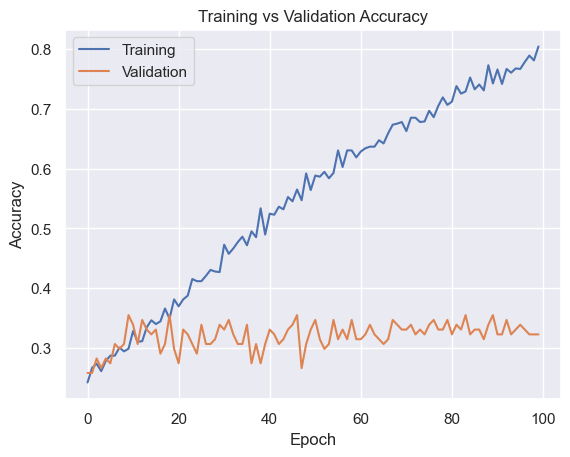

In [38]:
sns.set()
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Training vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.savefig('cnn_hist1.png')
plt.show()

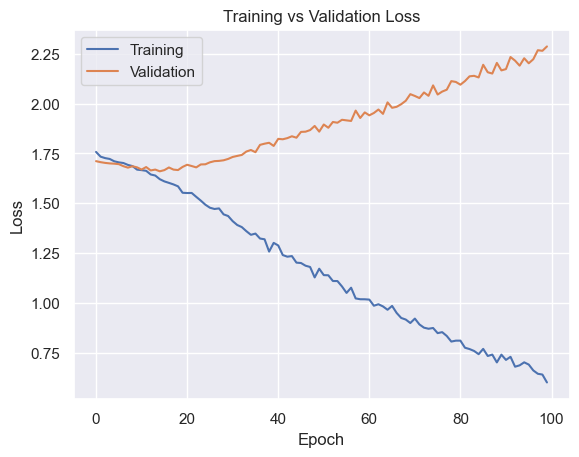

In [39]:

plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('Training vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.savefig('cnn_hist2.png')
plt.show()